# Objective:

**The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.**


# 1. Importing the Necessary Libraries

In [1]:
import pandas as pd  #to manipulate the data we use pandas 

import numpy as np   #NumPy can be used to perform a wide variety of mathematical operations on arrays.

import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive 
                                       # visualizations in Python. Matplotlib makes easy things easy and hard things possible.
    
import seaborn as sns     #Seaborn library is a widely popular data visualization library that is commonly used for 
                                         #data science and machine learning tasks.
from warnings import filterwarnings  ## filter the Warning 
filterwarnings('ignore')

# 2. Loading the Dataset

In [2]:
data=pd.read_excel(r"C:\Users\mdine\Downloads\Clustering\Clustering\EastWestAirlines.xlsx") #read the data from zomato dataset using pandans
data.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [3]:
data.columns #checking columns 

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [4]:
data.shape

(3999, 12)

### cheching information about data and  Statistical Summary

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
data.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

# 3. EDA [Exploratory Data Analysis]

### check duplicated

In [7]:
data.duplicated().sum()

0

### checking Null values

In [8]:
data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

<Axes: >

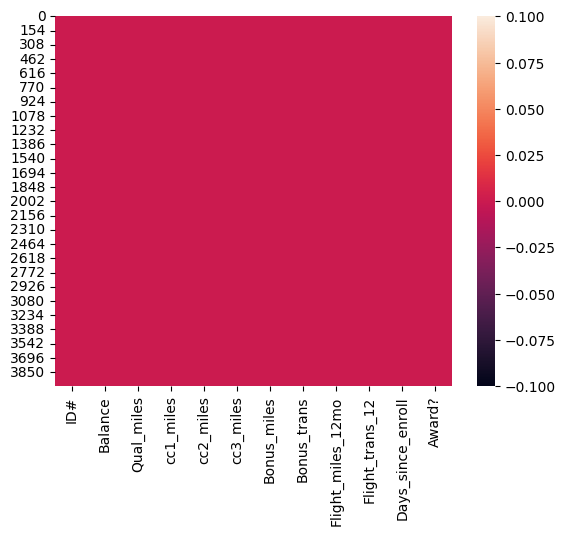

In [9]:
sns.heatmap(data.isnull())

<Axes: >

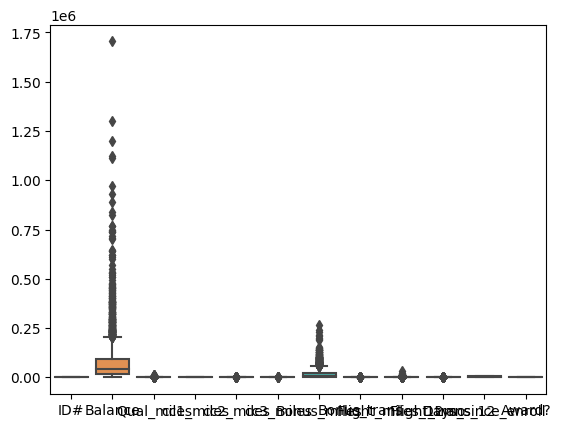

In [10]:
sns.boxplot(data)

In [11]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

<Axes: >

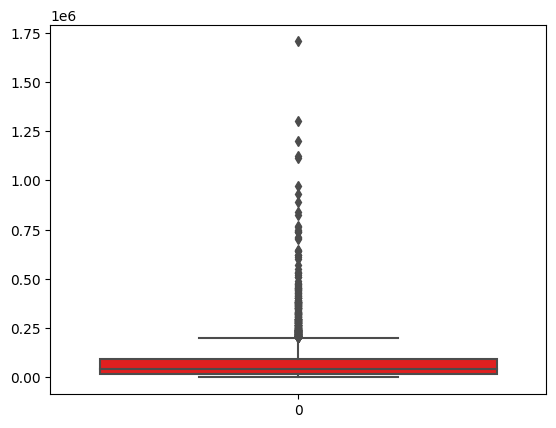

In [12]:
sns.boxplot(data.Balance,color='red')

## Removing outliers 

In [13]:
Q1 = data.Balance.quantile(0.25)
Q3 = data.Balance.quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

18527.5 92404.0
73876.5


(-92287.25, 203218.75)

In [15]:
data[(data.Balance<lower_limit)|(data.Balance>upper_limit)]

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8        9   443003           0          3          2          1         1753   
24      25   205651         500          1          1          1         4025   
32      33   276571           0          4          1          1        42044   
43      44   619393           0          3          1          1        15008   
45      46   288865         967          1          1          1        23600   
...    ...      ...         ...        ...        ...        ...          ...   
3754  3777   221543           0          1          1          1        10300   
3756  3779   203353           0          1          1          1        14000   
3772  3795   822321           0          5          1          1       138334   
3788  3811   374613           0          1          2          1        23592   
3839  3862   204693           0          1          1          1         5159   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
8              43               3850               12               6948   
24             21                700                4               7932   
32             23                  0                0               7872   
43             14                  0                0               7819   
45             14               2000                4               6884   
...           ...                ...              ...                ...   
3754            5                200                3               3554   
3756           13               4000                8               3557   
3772           26                600                2               3288   
3788           31               5000               14               3463   
3839            5                  0                0               1672   

      Award?  
8          1  
24         0  
32         0  
43         1  
45         1  
...      ...  
3754       1  
3756       1  
3772       1  
3788       1  
3839       0  

[266 rows x 12 columns]

In [16]:
data= data[(data.Balance>lower_limit)&(data.Balance<upper_limit)]

<Axes: >

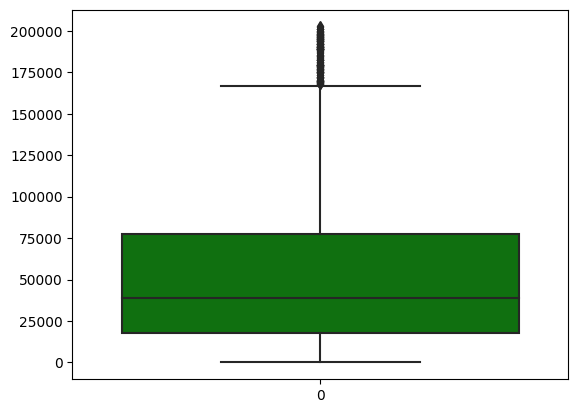

In [17]:
sns.boxplot(data.Balance,color='green')

<Axes: >

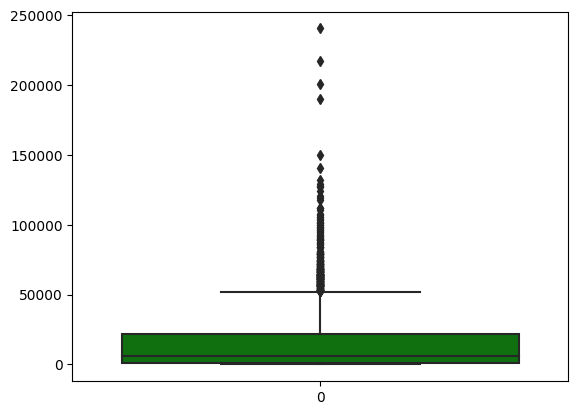

In [20]:
sns.boxplot(data.Bonus_miles,color='green')

In [21]:
Q1 = data.Bonus_miles.quantile(0.25)
Q3 = data.Bonus_miles.quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

1100.0 21559.0
20459.0


(-29588.5, 52247.5)

In [22]:
data[(data.Bonus_miles<lower_limit)|(data.Bonus_miles>upper_limit)]

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
11      12    96522           0          5          1          1        61105   
20      21   120576           0          5          1          1        58831   
79      82    38896           0          5          1          1        76988   
85      88    35418           0          5          1          1        58557   
94      97   185549           0          5          1          1       110859   
...    ...      ...         ...        ...        ...        ...          ...   
3822  3845   166638           0          5          1          1        64572   
3846  3869    97510        1678          5          1          1        71609   
3855  3878   190730           0          5          1          1        78916   
3883  3906   126167           0          5          1          1       190160   
3917  3940   130748           0          4          1          1        65510   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
11             19                  0                0               6924   
20             23                250                2               6896   
79             16                556                1               7771   
85             18                900                3               6813   
94             39               2950               16               6778   
...           ...                ...              ...                ...   
3822           22                  0                0               1697   
3846           51               7650               26               1665   
3855           28               2450                9               1648   
3883           15                  0                0               1612   
3917           37               6349                7               1545   

      Award?  
11         1  
20         1  
79         1  
85         1  
94         1  
...      ...  
3822       0  
3846       1  
3855       1  
3883       1  
3917       0  

[260 rows x 12 columns]

In [23]:
data= data[(data.Bonus_miles>lower_limit)&(data.Bonus_miles<upper_limit)]

<Axes: >

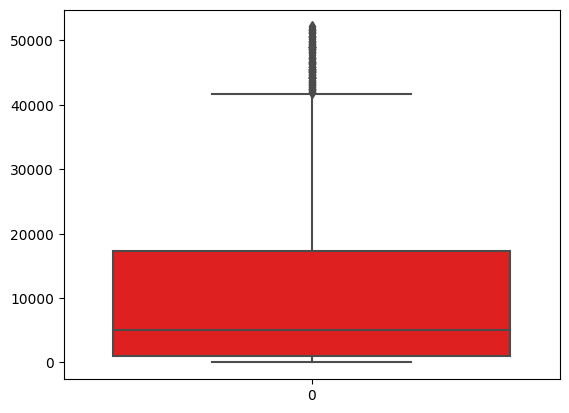

In [24]:
sns.boxplot(data.Bonus_miles,color='red')

### We don't need to remove outliers 

# Data is Cleaned now, Lets go to to Visualization

## 4.1) Histograms
Histograms are one of the most common graphs used to display numeric data. distribution of the data --- whether the data is normally distributed or if it's skewed (to the left or right)

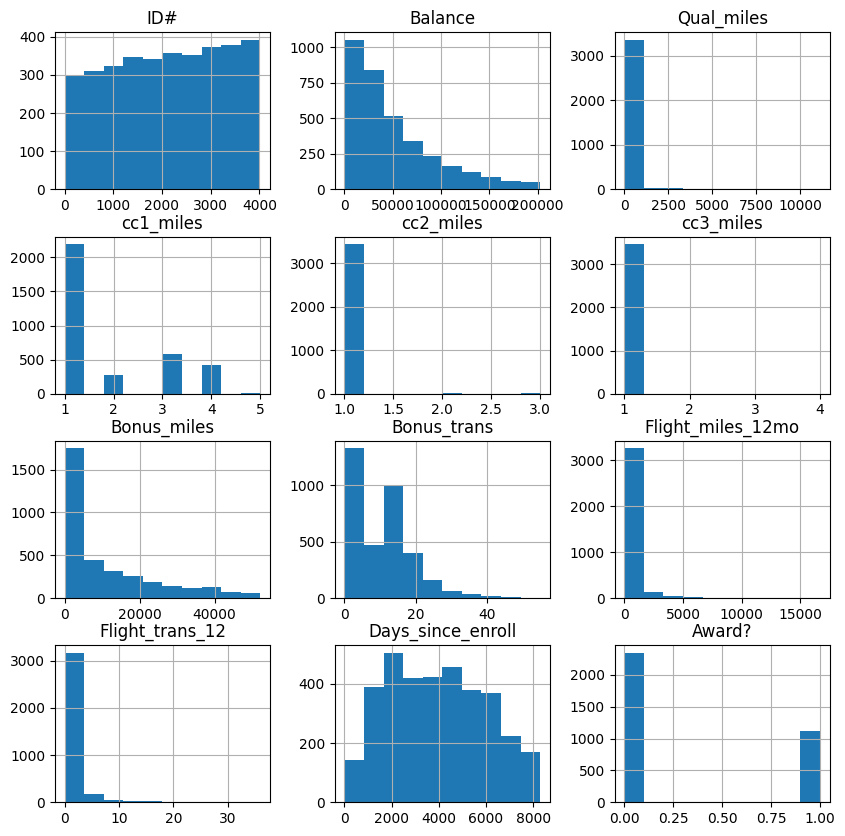

In [25]:
# Histogram of each feature
data.hist(bins=10,figsize=(10,10))    
plt.show()

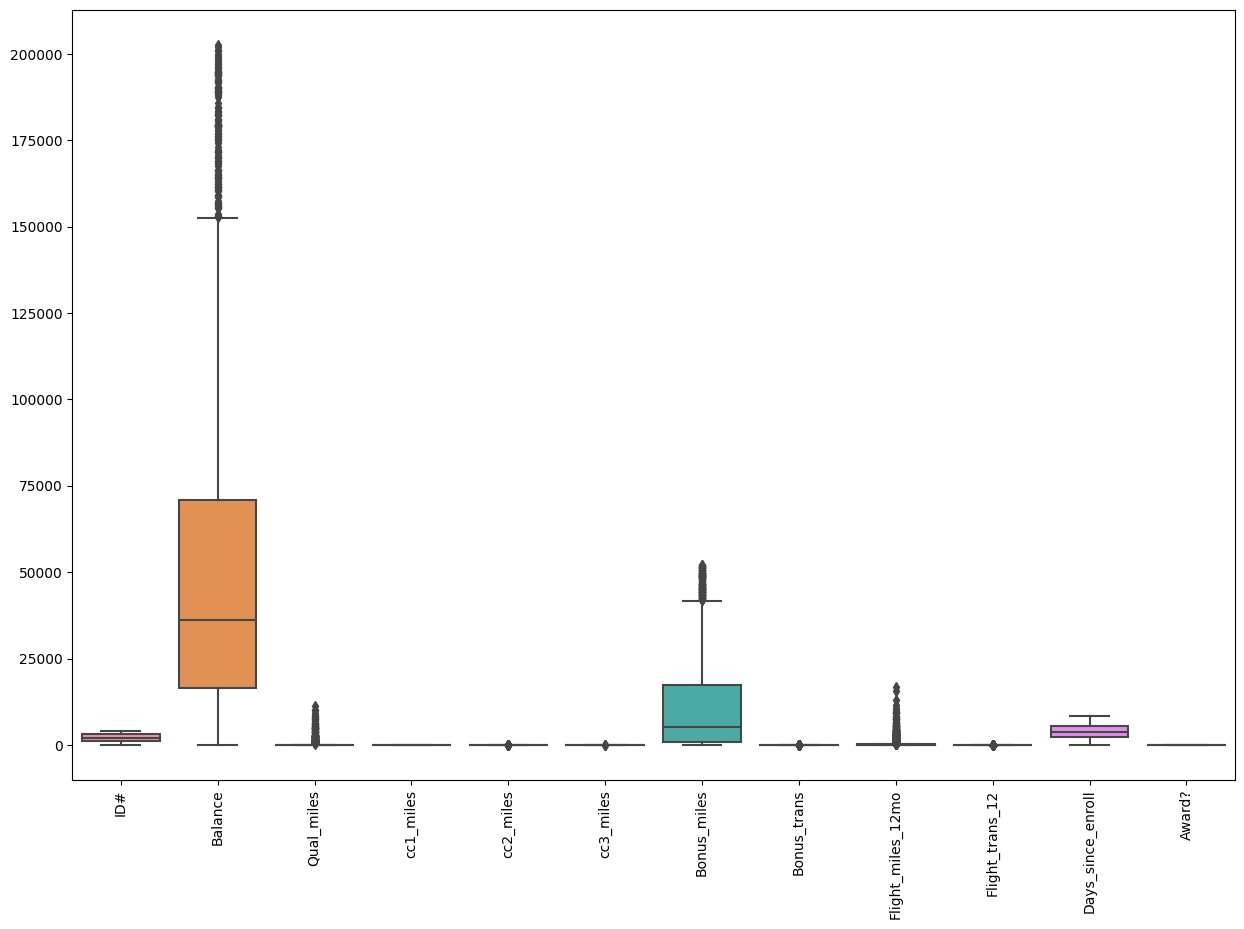

In [26]:
# Box Plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

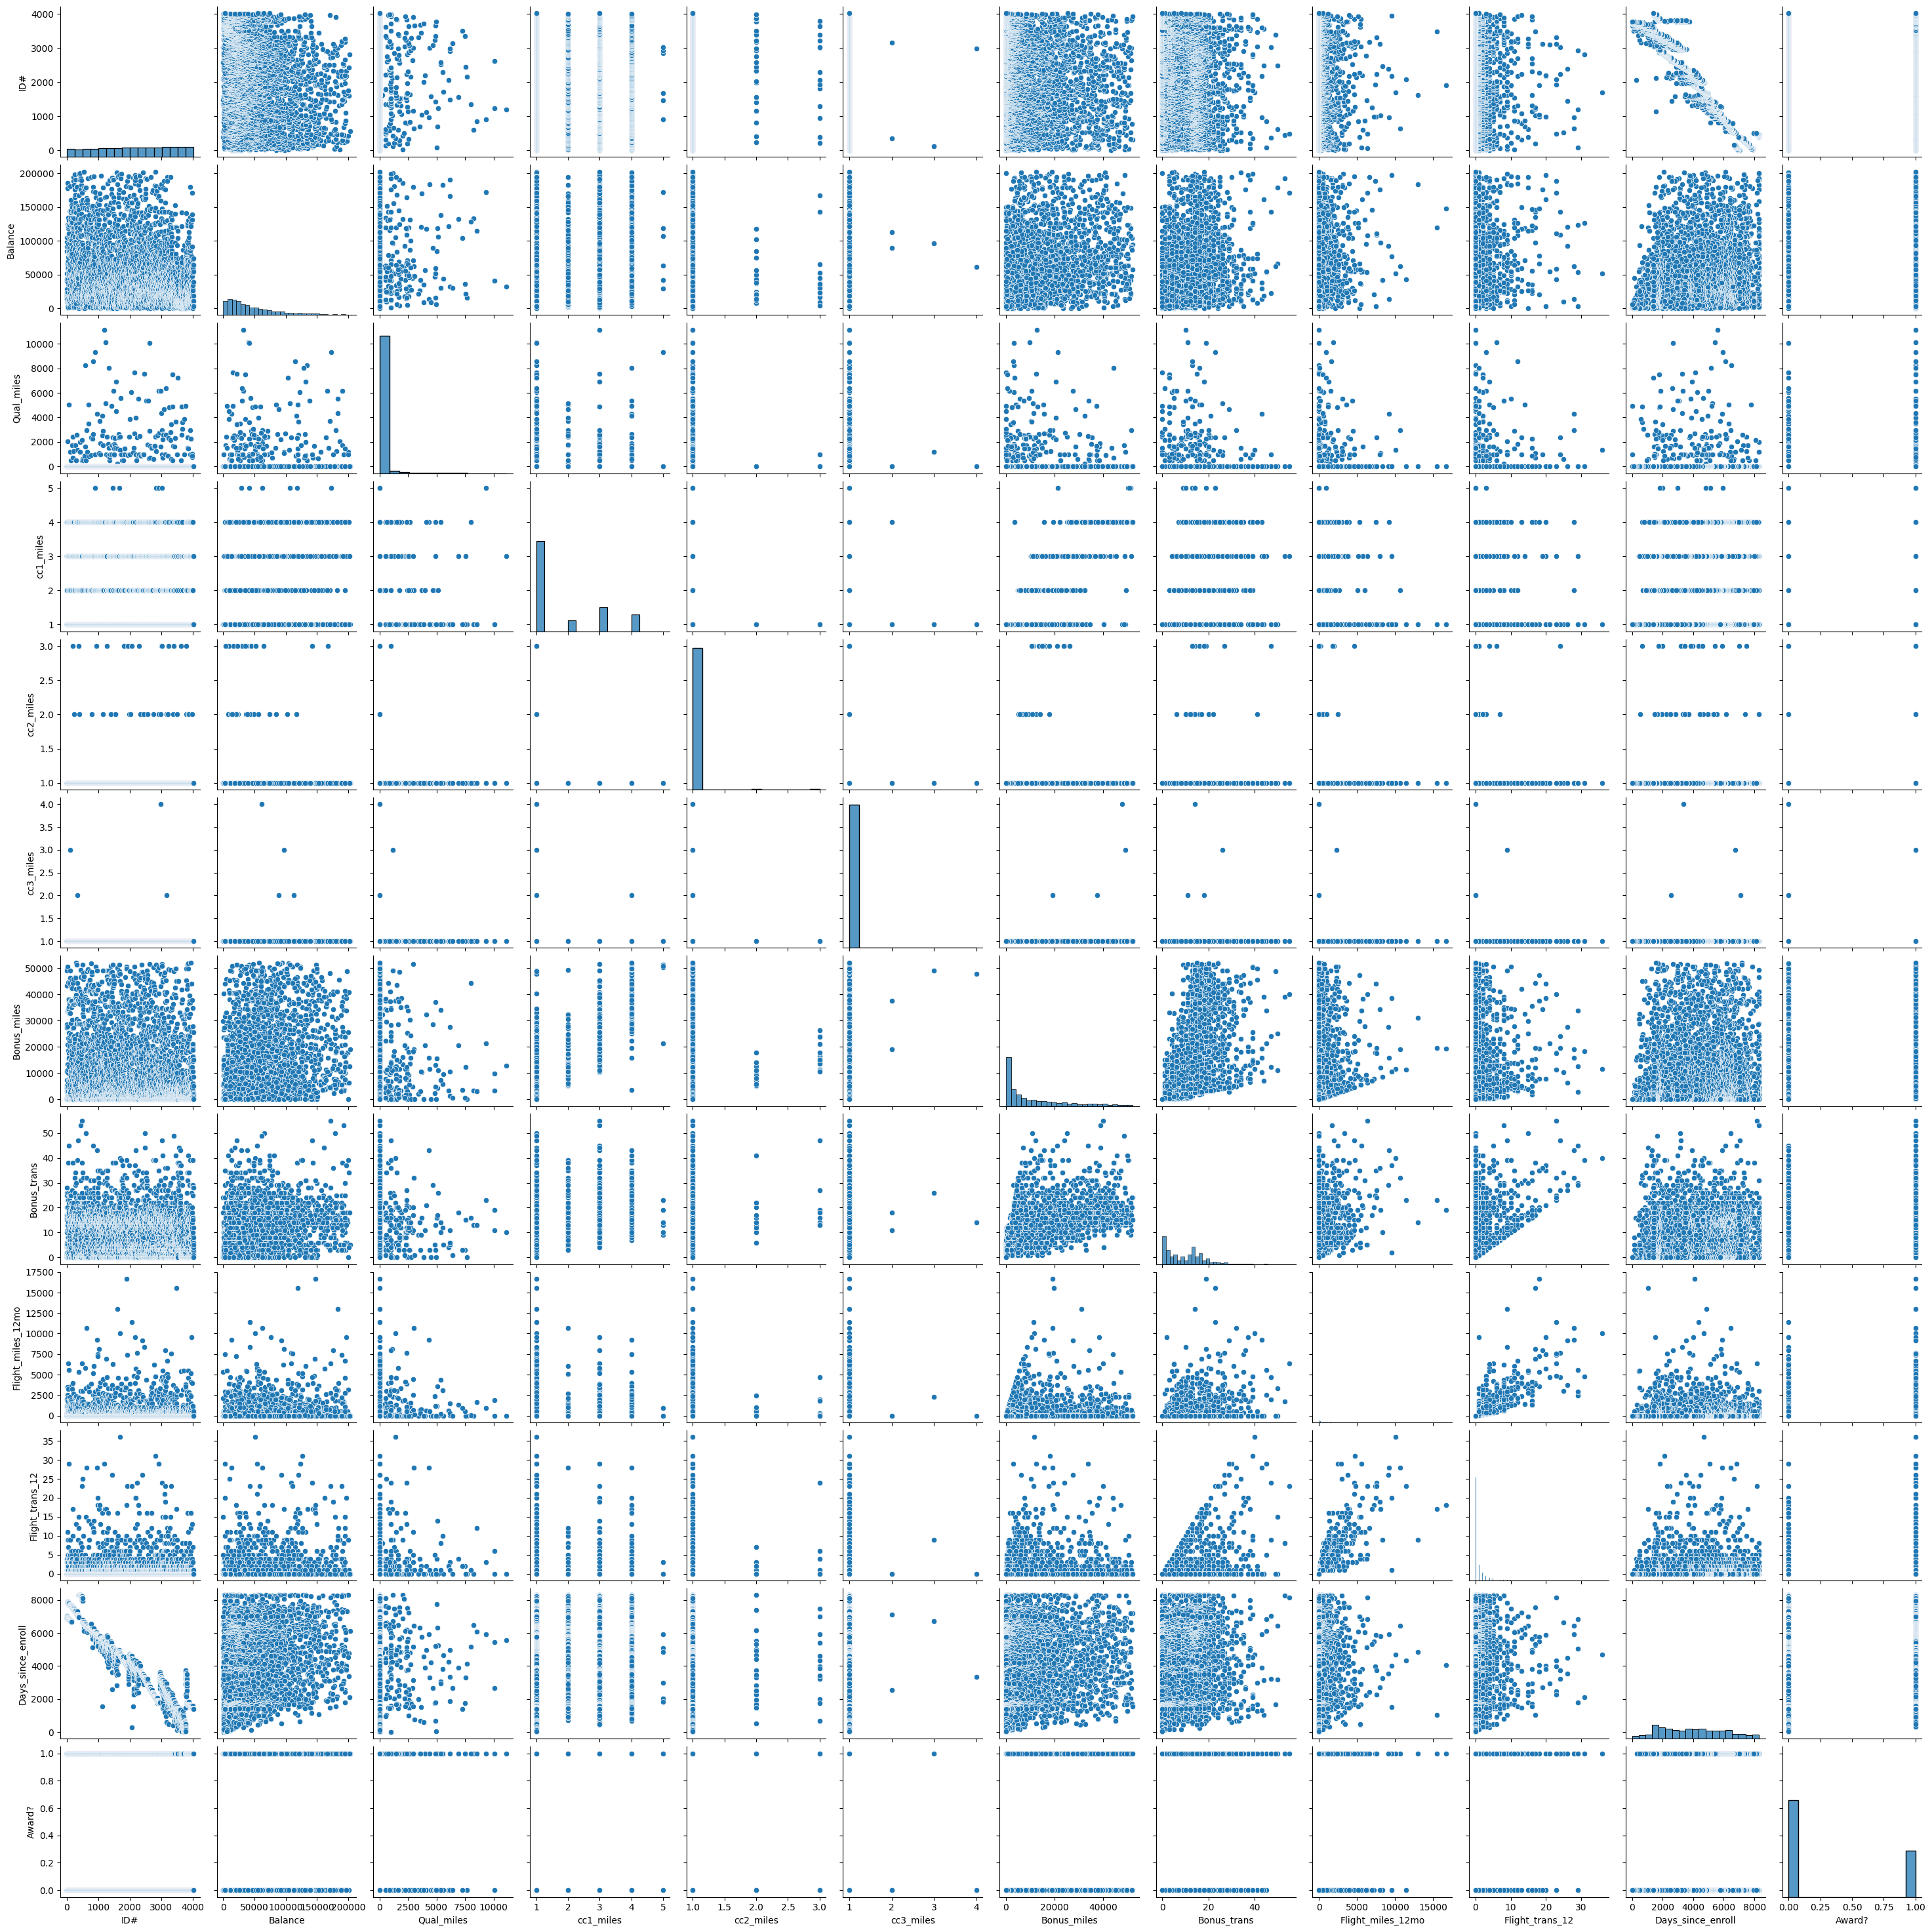

In [27]:
# Scatter Plots
sns.pairplot(data)
plt.show()

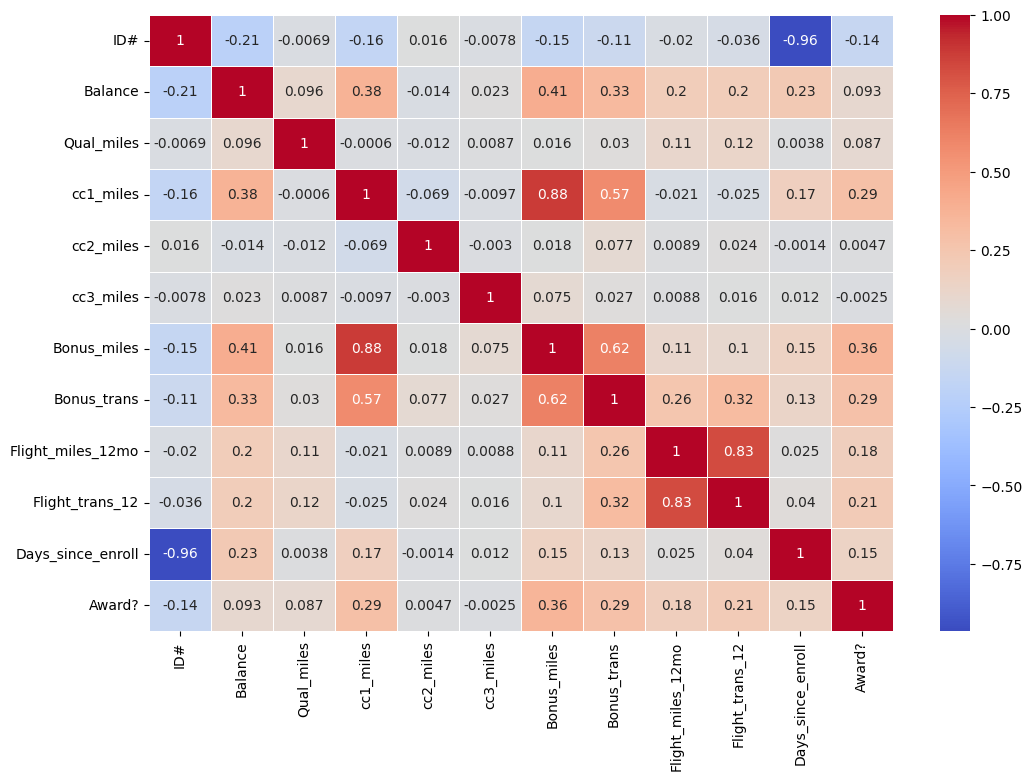

In [28]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

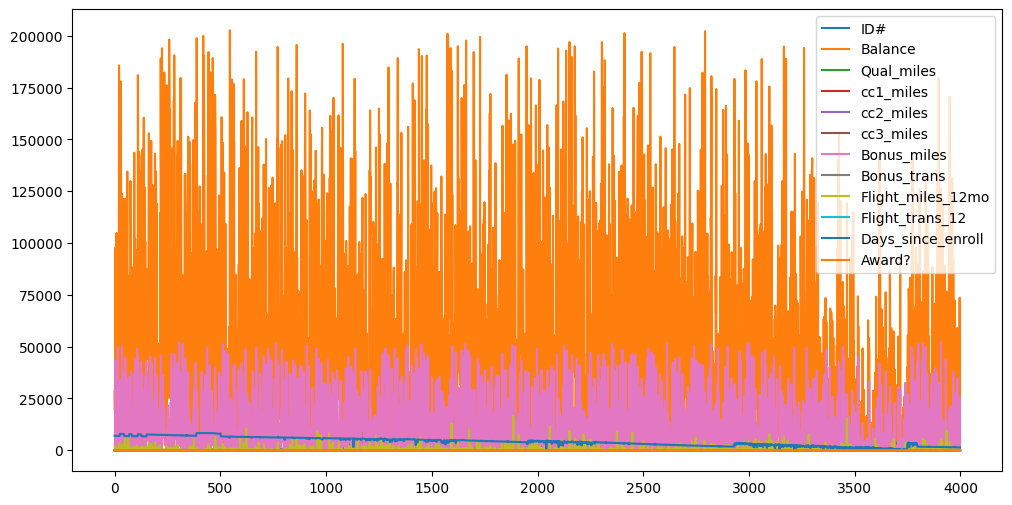

In [29]:
# Time Series Plots (if applicable)
plt.figure(figsize=(12, 6))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)
plt.legend()
plt.show()

**Histograms for each feature to see their distributions.**

**Box plots for each feature to visualize the spread and detect outliers.**

**Scatter plots for pairwise feature relationships.**

**Correlation matrix heatmap to see correlations between features.**

**Time series plots for trends over the indices (if the indices represent time).**

# Model Building

## StandardScaler 

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

print(X_scaled)

[[-1.8215719  -0.49470322 -0.17048239 ... -0.35375725  1.49101343
  -0.69219302]
 [-1.82070587 -0.69485788 -0.17048239 ... -0.35375725  1.47535297
  -0.69219302]
 [-1.81983985 -0.19756385 -0.17048239 ... -0.35375725  1.50765268
  -0.69219302]
 ...
 [ 1.65812446  0.52763973 -0.17048239 ... -0.35375725 -1.24858958
   1.44468374]
 [ 1.65899049  0.10708778 -0.17048239 ... -0.0197173  -1.24907897
  -0.69219302]
 [ 1.65985651 -1.05985505 -0.17048239 ... -0.35375725 -1.25054714
  -0.69219302]]


# K-Means Clustering

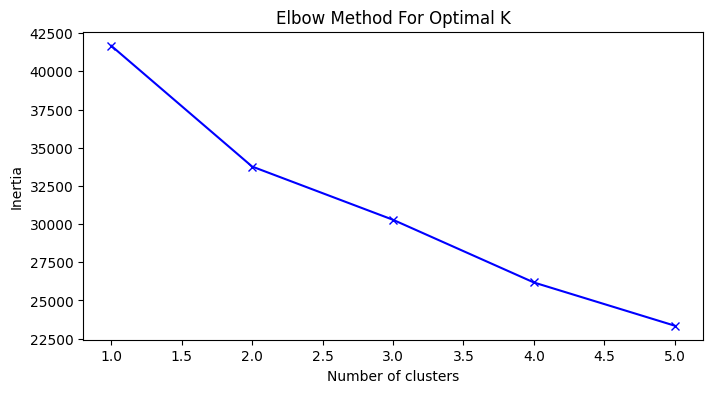

K-Means Silhouette Score: 0.29


In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 6)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

# Apply K-Means with the optimal number of clusters (let's choose K=2 based on the Elbow curve)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluate the clustering result
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette:.2f}')


# Hierarchical Clustering

In [34]:
from sklearn.cluster import AgglomerativeClustering

# Experiment with different linkage criteria
linkages = ['ward', 'complete', 'average', 'single']
for linkage in linkages:
    hier_clust = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    hier_labels = hier_clust.fit_predict(X_scaled)
    hier_silhouette = silhouette_score(X_scaled, hier_labels)
    print(f'Hierarchical Clustering ({linkage} linkage) Silhouette Score: {hier_silhouette:.2f}')


Hierarchical Clustering (ward linkage) Silhouette Score: 0.25
Hierarchical Clustering (complete linkage) Silhouette Score: 0.89
Hierarchical Clustering (average linkage) Silhouette Score: 0.89
Hierarchical Clustering (single linkage) Silhouette Score: 0.91


# DBSCAN Clustering

In [35]:
from sklearn.cluster import DBSCAN

# Experiment with different epsilon and min_samples values
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [2, 3, 4]
best_silhouette = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)
        
        # Only calculate silhouette score if there are more than 1 cluster (ignore noise label -1)
        if len(set(dbscan_labels)) > 1:
            dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
            if dbscan_silhouette > best_silhouette:
                best_silhouette = dbscan_silhouette
                best_params = (eps, min_samples)
                
        print(f'DBSCAN (eps={eps}, min_samples={min_samples}) Silhouette Score: {dbscan_silhouette:.2f}')
        
print(f'Best DBSCAN params: eps={best_params[0]}, min_samples={best_params[1]}, Silhouette Score: {best_silhouette:.2f}')


DBSCAN (eps=0.3, min_samples=2) Silhouette Score: -0.50
DBSCAN (eps=0.3, min_samples=3) Silhouette Score: -0.52
DBSCAN (eps=0.3, min_samples=4) Silhouette Score: -0.40
DBSCAN (eps=0.5, min_samples=2) Silhouette Score: -0.37
DBSCAN (eps=0.5, min_samples=3) Silhouette Score: -0.37
DBSCAN (eps=0.5, min_samples=4) Silhouette Score: -0.39
DBSCAN (eps=0.7, min_samples=2) Silhouette Score: -0.23
DBSCAN (eps=0.7, min_samples=3) Silhouette Score: -0.20
DBSCAN (eps=0.7, min_samples=4) Silhouette Score: -0.17
DBSCAN (eps=1.0, min_samples=2) Silhouette Score: -0.30
DBSCAN (eps=1.0, min_samples=3) Silhouette Score: -0.22
DBSCAN (eps=1.0, min_samples=4) Silhouette Score: 0.07
Best DBSCAN params: eps=1.0, min_samples=4, Silhouette Score: 0.07


# Visualization

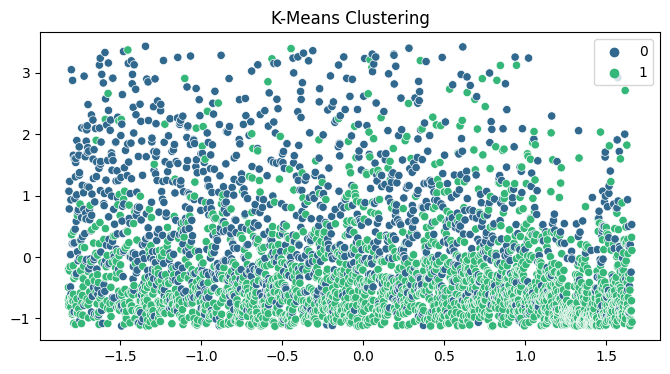

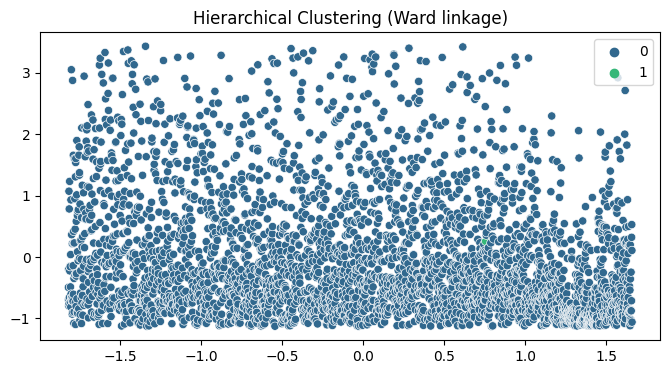

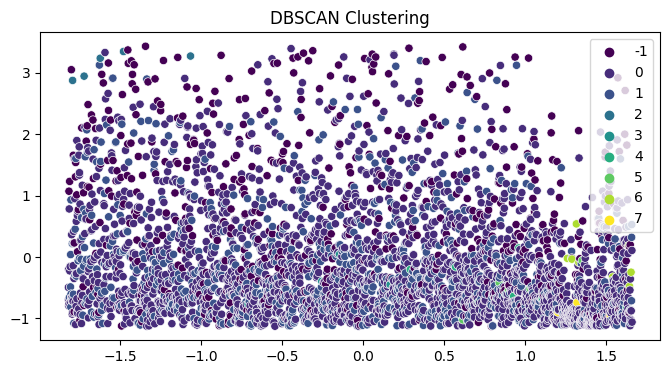

In [36]:
import seaborn as sns

# Function to visualize the clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', legend='full')
    plt.title(title)
    plt.show()

# Visualize K-Means Clusters
plot_clusters(X_scaled, kmeans_labels, 'K-Means Clustering')

# Visualize Hierarchical Clusters (for one of the linkage criteria)
plot_clusters(X_scaled, hier_labels, 'Hierarchical Clustering (Ward linkage)')

# Visualize DBSCAN Clusters
plot_clusters(X_scaled, dbscan_labels, 'DBSCAN Clustering')


# Summary

**K-Means: We used the Elbow method to determine the optimal number of clusters and applied K-Means clustering.**
    
**Hierarchical Clustering: We experimented with different linkage criteria.**
    
**DBSCAN: We experimented with different eps and min_samples values to find the best clustering configuration.**
    
**Evaluation: Silhouette scores were used to evaluate the quality of the clusters.**
    
**Visualization: We visualized the clusters using scatter plots.**